<a href="https://colab.research.google.com/github/fatimaoday/CNN-with-Fashion-MNIST-dataset/blob/main/codelab_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initializing data

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import glob

In [ ]:
tf.random.set_seed(42) #set the seed to 42

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data() #Load fashion mnist dataset 

In [ ]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

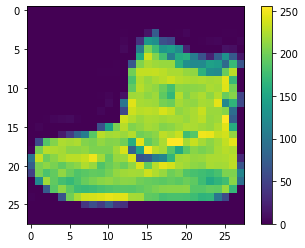

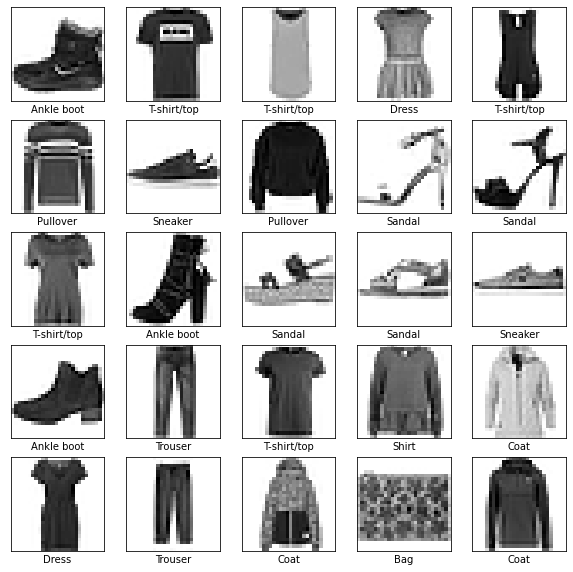

In [ ]:
# Plot some samples of the dataset to view them
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
# Normalize the values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

#DNN

In [ ]:
#create dataset creater function with using tf.data api 
def dataset_creater(x,y):
    data=tf.data.Dataset.from_tensor_slices((x,y))
    data=data.shuffle(10000)
    data=data.batch(32)
    data=data.prefetch(tf.data.experimental.AUTOTUNE)
    return data

In [ ]:
train_dataset=dataset_creater(x_train,y_train) #create train dataset
test_dataset=dataset_creater(x_test,y_test) #create test dataset

## Create, compile and fit model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_dataset, epochs=10, batch_size=32, validation_data=(test_dataset))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.8068 - accuracy: 0.6767 - val_loss: 1.6509 - val_accuracy: 0.8155
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6463 - accuracy: 0.8212 - val_loss: 1.6369 - val_accuracy: 0.8252
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6322 - accuracy: 0.8324 - val_loss: 1.6215 - val_accuracy: 0.8423
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6228 - accuracy: 0.8417 - val_loss: 1.6206 - val_accuracy: 0.8415
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6176 - accuracy: 0.8453 - val_loss: 1.6115 - val_accuracy: 0.8498
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6119 - accuracy: 0.8516 - val_loss: 1.6089 - val_accuracy: 0.8518
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6077 - accuracy: 0.8549 - val_loss: 1.6041 - val_accuracy:

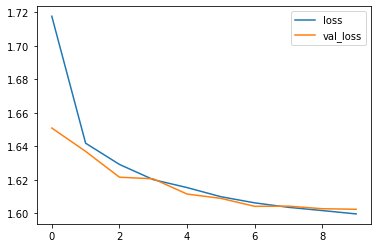

In [ ]:
# Plot the loss/validation loss values
hist_info=model.history.history
pf=pd.DataFrame(hist_info)
pf[['loss','val_loss']].plot.line()

In [ ]:
# #Restarting Tensorflow State
# del tf
# import tensorflow as tf
# tf.random.set_seed(42)

#CNN

In [ ]:
# reshape the x_train and x_test from (60000, 28, 28) (10000, 28, 28) to (60000, 28, 28, 1) (10000, 28, 28, 1)
x_train = np.asarray(x_train).reshape(-1, 28, 28, 1)
x_test = np.asarray(x_test).reshape(-1, 28, 28, 1)

# convert the labels to one hot vector
y_train=tf.one_hot(y_train,depth=10)
y_test=tf.one_hot(y_test,depth=10)

In [ ]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28, 1) y_train shape: (60000, 10)
x_test shape: (10000, 28, 28, 1) y_test shape: (10000, 10)


In [ ]:
#create dataset creater function with using tf.data api 
def dataset_creater(x,y,training=False):
    data=tf.data.Dataset.from_tensor_slices((x,y))
    data=data.shuffle(10000)
    data=data.batch(32)
    data=data.prefetch(tf.data.experimental.AUTOTUNE)
    return data

In [ ]:
train_dataset=dataset_creater(x_train,y_train,training=True)
test_dataset=dataset_creater(x_test,y_test)

## Create, compile and fit model

In [ ]:
model_2 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same',input_shape=(28, 28, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.20),
        tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),        
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.30),        
        tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),    
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.40),        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.30),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.20),
        tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)      

In [ ]:
model_2.compile(optimizer=tf.optimizers.Adam(lr=0.0001, decay=1e-6),loss=tf.losses.CategoricalCrossentropy(),metrics=['acc'])

In [ ]:
model_2.fit(train_dataset,epochs=20, validation_data=(test_dataset))

Epoch 1/20
1875/1875 [==============================] - 19s 9ms/step - loss: 0.9297 - acc: 0.6654 - val_loss: 0.3985 - val_acc: 0.8556
Epoch 2/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4047 - acc: 0.8541 - val_loss: 0.3026 - val_acc: 0.8901
Epoch 3/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3217 - acc: 0.8857 - val_loss: 0.2738 - val_acc: 0.8983
Epoch 4/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2847 - acc: 0.8958 - val_loss: 0.2506 - val_acc: 0.9095
Epoch 5/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2553 - acc: 0.9067 - val_loss: 0.2403 - val_acc: 0.9095
Epoch 6/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2341 - acc: 0.9137 - val_loss: 0.2356 - val_acc: 0.9137
Epoch 7/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2153 - acc: 0.9208 - val_loss: 0.2150 - val_acc: 0.9225
Epoch 8/20
1875/1875 [==============================] -

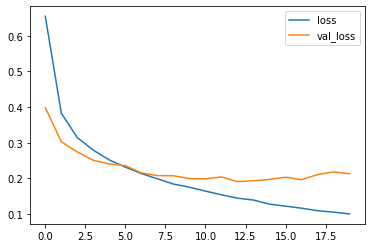

In [ ]:
# Plot the loss/validation loss values
hist_info=model_2.history.history
pf=pd.DataFrame(hist_info)
pf[['loss','val_loss']].plot.line()

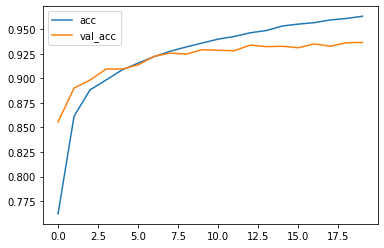

In [ ]:
# Plot the acc/val_acc values
pf[['acc','val_acc']].plot.line()